## Bisection method

* This is an important concept: One wish to **"sandwich"** the value that one wishes to compute.

In [ ]:
"Find the root of a monotone function f(x) in [a,b]"
function bisection(f::Function, a::Float64, b::Float64; tol=1e-12)
    
    fa=f(a)
    v=1.0

    if fa>0.0
        v=-1.0
    end

    if fa*f(b)>0
        println("Error: f(a) and f(b) have the same sign")
        #need to close the program if this occurs
    end

    x=(a+b)/2.0; ##The mid-point of the interval [a,b]

    while(b-a>tol) & ((a<x) &(x<b))
        if v*f(x)>0
            b=x;
        else
            a=x;
        end
        x=(a+b)/2;
    end

    return x
end 


In [ ]:
# define f(x)
f(x)=x+exp(x);

# define [a,b] and tol
a=-1.0; b=0.0;
tol=0;

@time x=bisection(f,a,b)
@time x=bisection(f,a,b)
@time x=bisection(f,a,b)


@printf("x = %20.15f\n", x)
@printf("f(x) = %20.15e\n\n", f(x))


# Fixed point iterations

Find the root of 
$$f(x)=xe^x-1 =0$$
by fixed point iterations.

* Need to come up with $g(x)$ such that 
$$ f(x^*)=0 \iff x^* = g(x^*) $$

* Introduce the fixed point iteration for $g$: $$ x_{k+1} := g(x_k).$$

**What should $g(x)$ be?** 
So that $x_k\longrightarrow x^*$

The following examples come from Gander-Gander-Kwok.

### Ex1: divide by $e^x$

$$ x=e^{-x} \implies x_{k+1}:= e^{-x_k} $$

* This fixed point iteration has a **first order** convergence rate
    * Oberve in the following computation that: **The number of correct digits grows linearly in k**

In [2]:
println("Try a few different initial guesses and observe if the iterations will converge to the same number.\n")

x=zeros(50)
x[1]=-1.5

println("\nIterating using initial guess\n\nx[1]=", x[1], "\n")

for k=1:length(x)-1
    x[k+1]=exp(-x[k]) 
    
    println("x[",k+1,"]=", round(x[k+1], 10) , ",\t difference = ", round(abs(x[k+1]-x[k]),10))
end


x[1]=-100.5
println("\nIterating using a different initial guess.\n\nx[1]=", x[1], "\n")
for k=1:length(x)-1
    x[k+1]=exp(-x[k]) 
    
    println("x[",k+1,"]=", round(x[k+1], 50) , ",\t difference = ", round(abs(x[k+1]-x[k]),10))    
end

Try a few different initial guesses and observe if the iterations will converge to the same number.


Iterating using initial guess

x[1]=-1.5

x[2]=4.4816890703,	 difference = 5.9816890703
x[3]=0.0113142864,	 difference = 4.470374784
x[4]=0.9887494794,	 difference = 0.9774351931
x[5]=0.372041646,	 difference = 0.6167078335
x[6]=0.6893255343,	 difference = 0.3172838883
x[7]=0.501914479,	 difference = 0.1874110553
x[8]=0.6053705803,	 difference = 0.1034561013
x[9]=0.5458720997,	 difference = 0.0594984806
x[10]=0.5793363239,	 difference = 0.0334642242
x[11]=0.560270081,	 difference = 0.0190662429
x[12]=0.5710548119,	 difference = 0.0107847309
x[13]=0.5649292302,	 difference = 0.0061255817
x[14]=0.5684003709,	 difference = 0.0034711407
x[15]=0.5664307936,	 difference = 0.0019695773
x[16]=0.5675475222,	 difference = 0.0011167286
x[17]=0.5669140794,	 difference = 0.0006334428
x[18]=0.5672733008,	 difference = 0.0003592214
x[19]=0.5670695607,	 difference = 0.0002037401
x[20]=0.5671851073,	 d

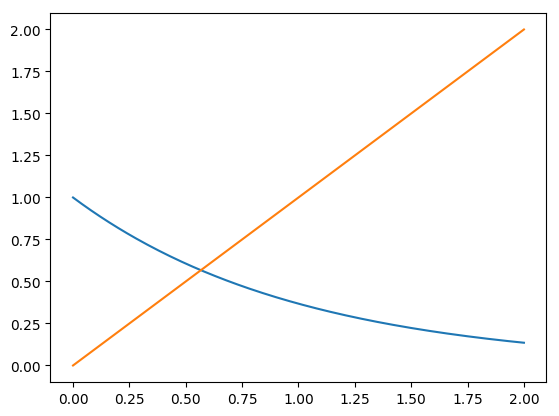

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd34c22ef90>
 PyObject <matplotlib.lines.Line2D object at 0x7fd34c23e1d0>

In [1]:
using PyPlot

x=0:0.01:2

plot(x, exp.(-x),x,x)

### Ex2: add $x$ to the equation $xe^x-1=0$

$$ x+xe^{x}=1+x \implies x(1+e^x) = 1+x $$
Define the iterations:
$$x_{k+1}(1+e^{x_k}) = 1+x_k $$
or more conveniently: 
$$x_{k+1}:= \frac{1+x_k}{1+e^{x_k}} $$

* This fixed point iteration scheme has **second order** convergence rate: $$e_{k+1} \le C e_k^2 $$
because 
$$|g^\prime(x^*)|= -\frac{1-x^*e^{x^*}}{(1+e^{x^*})^2}=0$$
($1-x^*e^{x^*}=0$ because $x^*$ is the solution we want.

* **The number of correct digits doubles in each iteration** (if $e_0$ is sufficiently small
*  Oberve non-convergence resulting from using a bad initial condition: **initial error is very important**

In [4]:
x=zeros(10)

x[1]=1.567 #Initial condition that leads to very fast convergence

println("\nIterating using initial guess\n\nx[1]=", x[1], "\n")


for k=1:length(x)-1
    x[k+1]= (1.0+x[k])/(1.0+exp(x[k]))
    println("x[",k+1,"]=", round(x[k+1], 10) , ",\t difference = ", round(abs(x[k+1]-x[k]),10))    

end


x[1]=-100.5 #initial conditionthat leads to divergent iterations
println("\nIterating using initial guess\n\nx[1]=", x[1], "\n")

for k=1:length(x)-1
    x[k+1]= (1.0+x[k])/(1.0+exp(x[k]))
    println("x[",k+1,"]=", round(x[k+1], 10) , ",\t difference = ", round(abs(x[k+1]-x[k]),10))    

end


Iterating using initial guess

x[1]=1.567

x[2]=0.4431783958,	 difference = 1.1238216042
x[3]=0.564259492,	 difference = 0.1210810962
x[4]=0.5671417843,	 difference = 0.0028822922
x[5]=0.5671432904,	 difference = 1.5061e-6
x[6]=0.5671432904,	 difference = 0.0
x[7]=0.5671432904,	 difference = 0.0
x[8]=0.5671432904,	 difference = 0.0
x[9]=0.5671432904,	 difference = 0.0
x[10]=0.5671432904,	 difference = 0.0

Iterating using initial guess

x[1]=-100.5

x[2]=-99.5,	 difference = 1.0
x[3]=-98.5,	 difference = 1.0
x[4]=-97.5,	 difference = 1.0
x[5]=-96.5,	 difference = 1.0
x[6]=-95.5,	 difference = 1.0
x[7]=-94.5,	 difference = 1.0
x[8]=-93.5,	 difference = 1.0
x[9]=-92.5,	 difference = 1.0
x[10]=-91.5,	 difference = 1.0


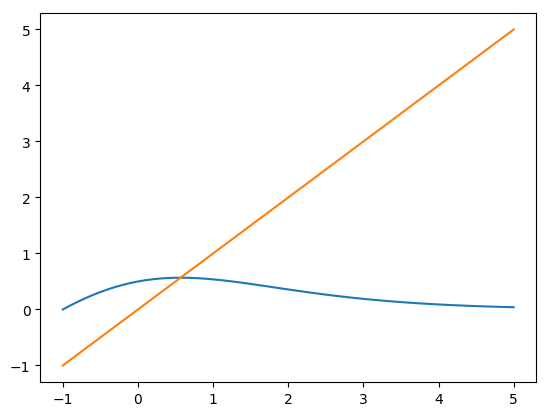

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f311c215d90>
 PyObject <matplotlib.lines.Line2D object at 0x7f311c215f90>

In [16]:
using PyPlot

x=-1:0.1:5

plot(x, (1.0+x)./(1.0+exp.(x)), x, x)


### ex3: add $x$ to the equation $xe^x-1=0$

$$ x+xe^{x}=1+x \implies x=1+x-xe^x=:g(x)$$
Define the iterations:
$$x_{k+1} = 1+x_k - x_k e^{x_k} $$

In [8]:
x=zeros(20)
x[1]=1.5

for k=1:length(x)-1
    x[k+1]=1.0+x[k]-x[k]*exp(x[k]) 
    println("x[",k+1,"]=", round(x[k+1], 10) , ",\t difference = ", round(abs(x[k+1]-x[k]),10))    

end


x[2]=-4.2225336055,	 difference = 5.7225336055
x[3]=-3.1606251356,	 difference = 1.0619084699
x[4]=-2.0266170714,	 difference = 1.1340080643
x[5]=-0.7595483141,	 difference = 1.2670687573
x[6]=0.5958274141,	 difference = 1.3553757282
x[7]=0.5146796876,	 difference = 0.0811477264
x[8]=0.6535678153,	 difference = 0.1388881276
x[9]=0.3971573272,	 difference = 0.2564104881
x[10]=0.8063500787,	 difference = 0.4091927515
x[11]=0.000353088,	 difference = 0.8059969907
x[12]=0.9999998753,	 difference = 0.9996467873
x[13]=-0.7182812753,	 difference = 1.7182811506
x[14]=0.6319451818,	 difference = 1.350226457
x[15]=0.4430879272,	 difference = 0.1888572546
x[16]=0.7529743706,	 difference = 0.3098864434
x[17]=0.1541792715,	 difference = 0.5987950992
x[18]=0.9742983117,	 difference = 0.8201190403
x[19]=-0.6069175816,	 difference = 1.5812158933
x[20]=0.7238696687,	 difference = 1.3307872503


### A more organized way to study the iterations

* Write a general function implementing teh fixed point interation
* pass in different $g$ and $x_0$ to this function 

In [ ]:
#x is a vector to store teh approximations computed along the iterations
#function assumes that x[1] is the assigned initial guess
function FixedPointItrs!(x::Array{Float64,1}, g)
    for k=1:length(x)-1
        x[k+1]=g(x[k])
    end
end

In [ ]:
x=zeros(12)
x[1]=1.5

g1(y)=exp(-y)
g2(y)=(1.0+y)/(1.0+exp(y))
g3(y)=1.0+y-y*exp(y)

println("\nCompare different fixed-point iterations (different g's) for solving the same equation.\n")

FixedPointItrs!(x, g1)

y=copy(x)
FixedPointItrs!(y, g2)

z=copy(x)
FixedPointItrs!(z, g3)

println("\nSequence generated by g=", g1)
println(round(x',6))
println("\nSequence generated by g=", g2)
println(round(y',6))
println("\nSequence generated by g=", g3)
println(round(z',6))



## Two fixed point iterations to solve linear systems of equations

* Jacobi iterations
* Gauss-Seidel iterations

Let the linear system of equations be 
$$ Ax =b, $$
where $A$ is an $N\times n$ invertible matrix, and $x,b$ are two vectors in $\mathbb{R}^n$.


A general strategy in coming up with fixed point iterations is to *split* $A$ into the sum of two matrices, separate the equations accordingly by the equal sign
$$
A=M+N \implies Ax=b \iff Mx=-Nx+b
$$
and define the iterations
$$
Mx_{k+1} = -Nx_{k} +b.
$$

**Of course, $M$ has to be very simple and easy to invert.**

**Both iterative schemes can be used to solve *nonlinear* equations**


### Jacobi iterations

In the Jacobi iterations, $M$ is the diagonal of $A$ (and $N$ is $A$ with its diagonal culled out).

* Very easy parallelization


$$ 
a_{11} \mathbf{x_1^{(k+1)}} + a_{12} x_2^{(k)}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_1 
$$

$$ 
a_{21} x_1^{(k)} + a_{22} \mathbf{x_2^{(k+1)}}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_2 
$$

$$\vdots$$


Solving nonlinear equations: $ f_1(x) = 0,f_2(x)=0,...,f_n(x)=0, x=(x_1,x_2,...,x_n) $

$$ f_1(\mathbf{x_1^{(k+1)}}, x_2^{(k)}, ..., x_n^{(k)})=0 $$
$$ f_2({x_1^{(k)}}, \mathbf{x_2^{(k+1)}}, ..., x_n^{(k)})=0 $$
$$\vdots$$

In [1]:
#Example: Jacobi iterations

A=[10. 2. 3.; 4. 15. 6.; 7. 8. 19.]

#What happens if the diagonal elements are smaller, but A is still invertible?
# A=[1. 2. 3.; 4. 5. 6.; 7. 8. 19.]


M=zeros(3,3)

M=diagm( diag(A),0)

N=A-M

Minv = inv(M)

b=ones(3)
x=rand(3)

#the following for-loop is only for illustrating teh concept of Jacobi iteration
#in practice, one should never allocate memory for M or Minv
for k=1:25
   x = Minv*(-N*x+b) 
   println(x)
end

println("\nChecking the residual: ", A*x-b)

[-0.171195, -0.272955, 0.000141193]
[0.154549, 0.112262, 0.230632]
[0.00835797, -0.0667991, -0.0515757]
[0.128833, 0.0850682, 0.0776783]
[0.0596829, 0.00124001, -0.0306512]
[0.108947, 0.0630117, 0.030121]
[0.0783613, 0.0255656, -0.0140382]
[0.0990983, 0.0513856, 0.0129971]
[0.0858237, 0.0350416, -0.00551436]
[0.094646, 0.0459861, 0.00625795]
[0.0889254, 0.0389246, -0.00160056]
[0.0926953, 0.0435934, 0.0034803]
[0.0902372, 0.0405558, 0.000125559]
[0.0918512, 0.0425532, 0.00231016]
[0.0907963, 0.041249, 0.000874544]
[0.0914878, 0.0421045, 0.00181232]
[0.0910354, 0.041545, 0.00119732]
[0.0913318, 0.0419116, 0.0015996]
[0.0911378, 0.0416717, 0.00133602]
[0.0912649, 0.0418288, 0.00150853]
[0.0911817, 0.041726, 0.00139554]
[0.0912361, 0.0417933, 0.00146951]
[0.0912005, 0.0417492, 0.00142107]
[0.0912238, 0.0417781, 0.00145278]
[0.0912085, 0.0417592, 0.00143201]

Checking the residual: [-0.00010013, -0.000185771, -0.000258353]


In [2]:
eigvals(Minv*N)

3-element Array{Float64,1}:
  0.65478 
 -0.223815
 -0.430965

In [ ]:
#a more appropirate way to implementing the JAcobi iterations
function JacobiIterations!(x, A, b, numitrs)
   
   xnext=copy(x)
   sum=0.0
    
   for itr=1:numitrs 
   for i=1:size(A,1)
        sum=0.0
        for j in [1:i-1; i+1:3]
            sum+=A[i,j]*x[j]
        end
        xnext[i] = (b[i]-sum)/A[i,i]
   end
    
   x.=xnext
   println(itr,": ", x)
   end 
end

x=rand(3)

JacobiIterations!(x, A, b, 25)

println(x)
println(A*x-b)

### Gauss-Seidel iterations

In the Gauss-Seidel iterations, $M$ is the lower triangular part of $A$ (including the diagonal)

* This algorithm is of sequential nature

$$ 
a_{11} \mathbf{x_1^{(k+1)}} + a_{12} x_2^{(k)}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_1 
$$

$$ 
a_{21} \mathbf{x_1^{(k+1)}} + a_{22} \mathbf{x_2^{(k+1)}}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_2 
$$
$$ \vdots$$

Solving nonlinear equations: $ f_1(x) = 0,f_2(x)=0,...,f_n(x)=0, x=(x_1,x_2,...,x_n) $

$$ f_1(\mathbf{x_1^{(k+1)}}, x_2^{(k)}, ..., x_n^{(k)})=0 $$
$$ f_2(\mathbf{x_1^{(k+1)}}, \mathbf{x_2^{(k+1)}}, ..., x_n^{(k)})=0 $$
$$\vdots$$

In [ ]:
function GaussSeidelIterations!(x, A, b, numitrs)
   
   sum=0.0

   for itr=1:numitrs 
   for i=1:size(A,1)
        sum=0.0
        for j in [1:i-1; i+1:3]
            sum+=A[i,j]*x[j]
        end
        x[i] = (b[i]-sum)/A[i,i]
   end
   println(itr, ": ", x)
   end 
end

In [ ]:
x=rand(3)

GaussSeidelIterations!(x, A, b, 25)

println(x)
println(A*x-b)

# Convergence of iterative algorithms

* linearly convergent algorithms: (**the error in the next step is a linear function of the current error**)
$$ e_{n+1} = a e_n $$
    
    * number of correct digits is a linear function of the number of iterations: $$ \textrm{num of accurate digits} = \alpha_0 n $$


* quadratically convergent algorithms: (**the error in the next step is a quadratic function of the current error**)
$$ e_{n+1} = a e_n^2 $$

    * number of correct digits doubles after each iterations: $$ \textrm{num of accurate digits} = \alpha_1 2^n$$


* p-th order convergent algorithms:
$$ e_{n+1} = a e_n^p $$

### Possible confusion with ***order of accuracy***

(For linearly convergent algorithms)
$$e_n \le Const\cdot \frac{1}{n^p}$$

**p-th order accurate algorithm**.

## Multi-step iterations

Use more than one previously computed approximations to predict the solution of $f(x)=0$.

E.g.
$$ x_{k+1} := g(x_k, x_{k-1}) $$

* IDEA: Use interpolation of $f$

### The secant method: $x_{k-1}, x_k \longrightarrow x_{k+1}$


$$ x_{k+1} := x_k -f(x_k)\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}$$

# Iterative methods for solving nonlinear systems of equations

* Direct generalization of the **fixed-point iterations** for a single equation
$$ x_{k+1}:=g(x_k) $$ with $x_k$ being a vector and $g(x_k)$ also.

* See above on **Jacobi** and **Gauss-Seidel** iterations

* **Newton's method**. Caution: need to solve a linear system at every iteration. Generally difficult and costly for large systems. Try use **quasi-Newton method**.

In [ ]:
#x is an array used to store the approximations computed along the iterations
#solution at the k-th iteration is x[:,k]
#function assumes that x[:,1] is the assigned initial guess
function FixedPointItrs!(x::Array{Float64,2}, g)
    for k=1:size(x,2)-1
        x[:,k+1]=g(x[:,k])
    end
end


## Newton's method for systems
$f:\mathbb{R}^d \mapsto \mathbb{R}^d$; i.e. $f$ maps a vector of $d$ component, x, to a vector of $d$ component, denoted by $f(x_k)$. 

$f(x_*)=0$. Taylor expansion gives
$$f(x_*) = 0=f(x_k)+f^\prime(x_k)(x_*-x_k)+\ldots$$

Replace $x_*$ by $x_{k+1}$ yields Newton's method:
$$ f^\prime(x_k)(x_{k+1}-x_k))=-f(x_k), $$
where  the derivative $f^\prime(x)$ is a $d\times d$ matrix.

Here, the $g$ function that defines the fixedpoint iterations is: 
$$ g(x) := x-f^\prime(x)^{-1} f(x) $$

# Worked example: Problem 5.22 in Gander-Gander-Kwok

* radius of pipe: $r=4$

* rope length: $L=30$

Find the distance of the pipe to the ceiling above: $h$.

## Setting up equations: 

* Need to variables to describe the system. $h$ and $\theta$

* radius of pipe = r  = $(h+r)\cos\theta$

* length of rope = L = (length of rope wrapping around the pipe) + (legth of rope in the air) $$L = 2\left( r(\pi - \theta) + (h+r)\sin\theta \right)$$

* Obtain two equations: 
$$f(h,\theta):=\left(\begin{array}{c}
f_{1}(h,\theta)\\
f_{2}(h,\theta)
\end{array}\right)=\left(\begin{array}{c}
(h+4)\cos\theta-4\\
(h+4)\sin\theta+4(\pi-\theta)-15
\end{array}\right)=\left(\begin{array}{c}
0\\
0
\end{array}\right)
$$

* Derivative of $f$: $$f^{\prime}(h,\theta)=\left(\begin{array}{cc}
\frac{\partial f_{1}}{\partial h} & \frac{\partial f_{1}}{\partial\theta}\\
\frac{\partial f_{2}}{\partial h} & \frac{\partial f_{2}}{\partial\theta}
\end{array}\right)=\left(\begin{array}{cc}
\cos\theta & -(h+4)\sin\theta\\
\sin\theta & (h+4)\cos\theta-4
\end{array}\right)$$

In [ ]:
f(h,θ)  = [ (h+4.0)*cos(θ)-4.0; (h+4.0)*sin(θ)+4.0*(π-θ)-15.0]

f′(h,θ) = [cos(θ) -(h+4.0)*sin(θ); sin(θ)  (h+4.0)*cos(θ)-4.0] 

Newton_prob522(x) = x - f′(x[1],x[2])\f(x[1],x[2]) #this is not usually how one should run Newton's method

In [ ]:
x0=[ 9.0; π/3.0]
x=zeros(2, 7)
x[:,1]=x0

g_prob522(x[:,1]) 
FixedPointItrs!(x,Newton_prob522)

x

In [ ]:
println("Verify that the equations are solved (f should be essentially 0): f = ", f(x[1, end], x[2,end]))

h, θ=x[:, end]

if norm(f(x[1, end], x[2,end]))<1e-10
    println("\nFound a solution: h=",round(h,10), ", θ=", round(θ,10))
else
    println("\nNewton method fails.")
end

In [ ]:
using Gadfly

t=collect(0:0.025:2π)

P=plot( layer(x=[4cos(π/2+θ) 0.0 4cos(π/2-θ)], y=[4sin(π/2+θ)-(h+4.0) 0.0 4sin(π/2+θ)-(h+4.0)], Geom.line(preserve_order=true)),
layer(x=4sin(t), y=(4cos(t)-h-4.0), Geom.line(preserve_order=true) ), Coord.cartesian(aspect_ratio=8./15.))

#draw(PDF("pipe.pdf", 3inch, 3inch), P)
